In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
df =  pd.read_csv('sales-of-shampoo-over-a-three-ye.csv',header=0)
df.head(2)

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Month                                      36 non-null     object 
 1   Sales of shampoo over a three year period  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [4]:
df['Month']= df.Month.apply(lambda x:'190'+x)
df.head(13)

,Month,Sales of shampoo over a three year period
0,1901-01,266.0
1,1901-02,145.9
2,1901-03,183.1
3,1901-04,119.3
4,1901-05,180.3
5,1901-06,168.5
6,1901-07,231.8
7,1901-08,224.5
8,1901-09,192.8
9,1901-10,122.9


<AxesSubplot:>

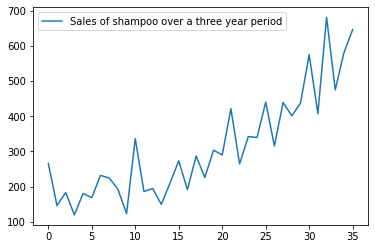

In [5]:
df.plot() # its showing an upward trend with no seasonality 

In [6]:
df.Month = pd.to_datetime(df.Month, format='%Y-%m-%d')

In [7]:
df.head(2)

,Month,Sales of shampoo over a three year period
0,1901-01-01,266.0
1,1901-02-01,145.9


In [8]:
df.index = df.Month # for further analysis

In [9]:
# Multiplicative Decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose
mul_result = seasonal_decompose(df['Sales of shampoo over a three year period'], model='multiplicative',period=1)

# Additive Decomposition
add_result = seasonal_decompose(df['Sales of shampoo over a three year period'], model='additive',period=1)

<IPython.core.display.Javascript object>

Text(0.5, 0.98, '\nMultiplicative Decompose')

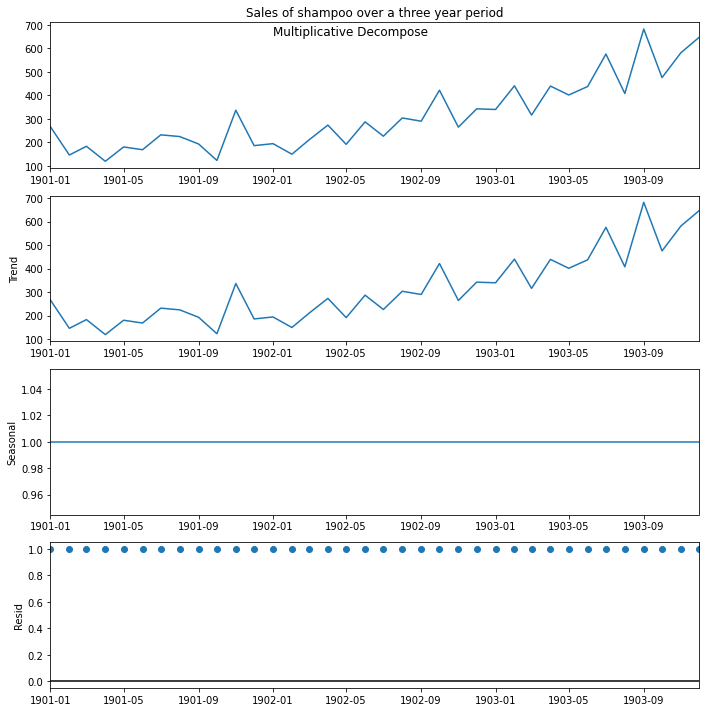

In [10]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)
# no seasonality , trend is there

<IPython.core.display.Javascript object>

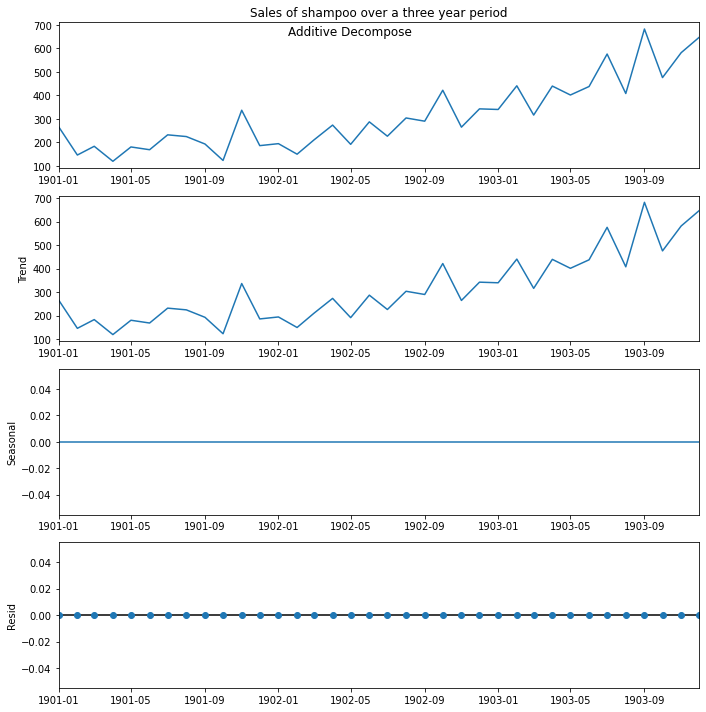

In [11]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)
plt.show() # no seasonality , trend is there

In [12]:
#Additive
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head(5) # actual values will be sum of all the columns

,seasoanilty,trend,residual,actual_values
Month,,,,
1901-01-01,0.0,266.0,0.0,266.0
1901-02-01,0.0,145.9,0.0,145.9
1901-03-01,0.0,183.1,0.0,183.1
1901-04-01,0.0,119.3,0.0,119.3
1901-05-01,0.0,180.3,0.0,180.3


In [13]:
#Multiplicative
new_df_mult = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_mult.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_mult.head(5)

,seasoanilty,trend,residual,actual_values
Month,,,,
1901-01-01,1.0,266.0,1.0,266.0
1901-02-01,1.0,145.9,1.0,145.9
1901-03-01,1.0,183.1,1.0,183.1
1901-04-01,1.0,119.3,1.0,119.3
1901-05-01,1.0,180.3,1.0,180.3


In [14]:
df.rename(columns={'Sales of shampoo over a three year period': 'sales3years'}, inplace=True)

In [15]:
df.drop(['Month'], axis = 1,inplace=True)
df.head()

,sales3years
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [16]:
# adf fuller stats to check the stationarity
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace=True)
adfuller_result = adfuller(df, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  # we can conclude than ts data is stationary 

ADF Statistic: 3.0601420836411806
p-value: 1.0
Critial Values:
   1%, -3.7238633119999998
Critial Values:
   5%, -2.98648896
Critial Values:
   10%, -2.6328004


In [17]:
#df.reset_index(level=0, inplace=True)

In [18]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.is_stationary(df)

Z:\Anaconda Framework\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.933218025378065, True)

Z:\Anaconda Framework\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


predicted=395.929734, expected=440.400000
predicted=358.586155, expected=315.900000
predicted=393.519927, expected=439.300000
predicted=356.934647, expected=401.300000
predicted=429.613822, expected=437.400000
predicted=408.123223, expected=575.500000
predicted=448.884757, expected=407.600000
predicted=512.736128, expected=682.000000
predicted=443.518281, expected=475.300000
predicted=687.689321, expected=581.300000
predicted=569.513571, expected=646.900000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

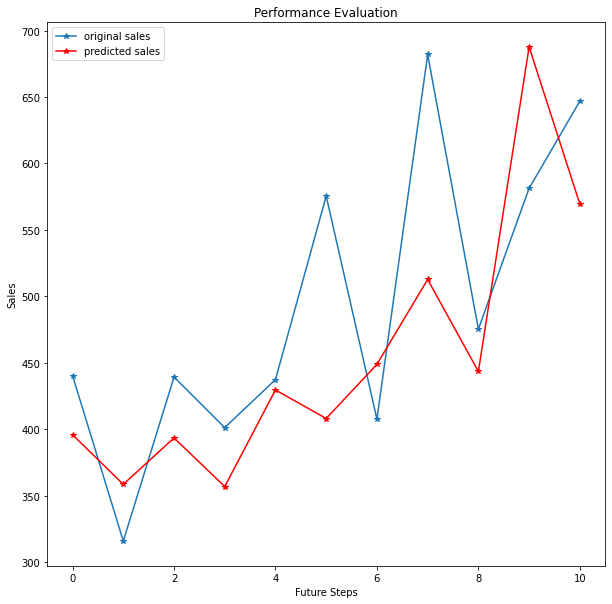

In [20]:

from sklearn.metrics import mean_squared_error
 

X = df.values
size = int(len(X) * 0.70)


train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []


for t in range(len(test)):
    model = ARIMA(history, order=(7,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    




# plot
plt.plot(test, label = 'original sales', marker = '*')
plt.plot(predictions, color='red', label = 'predicted sales', marker = '*')
plt.title('Performance Evaluation')
plt.xlabel('Future Steps')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [21]:
predictions

Z:\Anaconda Framework\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[array([395.92973363]),
 array([358.58615529]),
 array([393.5199265]),
 array([356.93464738]),
 array([429.61382181]),
 array([408.12322276]),
 array([448.88475731]),
 array([512.73612785]),
 array([443.51828071]),
 array([687.68932068]),
 array([569.51357135])]

In [22]:
df.reset_index(level=0, inplace=True)

In [23]:
actuals = df.sales3years[0:11]
actuals

0     266.0
1     145.9
2     183.1
3     119.3
4     180.3
5     168.5
6     231.8
7     224.5
8     192.8
9     122.9
10    336.5
Name: sales3years, dtype: float64

In [24]:
predictions

[array([395.92973363]),
 array([358.58615529]),
 array([393.5199265]),
 array([356.93464738]),
 array([429.61382181]),
 array([408.12322276]),
 array([448.88475731]),
 array([512.73612785]),
 array([443.51828071]),
 array([687.68932068]),
 array([569.51357135])]

In [25]:
import math
error = mean_squared_error(test, predictions)
print('Test Root Mean Squared Error: %.3f' % math.sqrt(error))

Test Root Mean Squared Error: 87.704
